In [65]:
import seaborn as sns
import numpy as np
import pandas as pd
from pathlib import Path
import quandl

In [2]:
quandl.ApiConfig.api_key = 'YOUR_QUANDL_API_HERE'

In [3]:
combined_data = pd.DataFrame()

In [4]:
start = '2005-01-01'
end = '2020-07-01'

In [5]:
# Daily Yield for AAA Rated US Corporate Bonds
usb_AAAy = quandl.get('ML/EMHYY', start_date=start, end_date=end)
usb_AAAy = usb_AAAy.rename(columns={'BAMLEMHBHYCRPIEY':'AAA_yield'})
usb_AAAy.head(-1)

,AAA_yield
DATE,
2005-01-03,6.96
2005-01-04,6.93
2005-01-05,6.96
2005-01-06,7.00
2005-01-07,7.00
...,...
2020-06-24,7.79
2020-06-25,7.82
2020-06-26,7.83


In [6]:
# Daily WTI Spot prices
wti = quandl.get("EIA/PET_RWTC_D", start_date=start, end_date=end)
wti = wti.rename(columns={'Value':'WTI_spot'})
wti.head(-1)

,WTI_spot
Date,
2005-01-03,42.16
2005-01-04,43.96
2005-01-05,43.41
2005-01-06,45.51
2005-01-07,45.32
...,...
2020-06-24,37.91
2020-06-25,38.66
2020-06-26,38.53


In [7]:
# Daily Yield for 20y & 30y US Treasuries 
tyc = pd.DataFrame()
tyc = quandl.get('USTREASURY/REALYIELD', start_date=start, end_date=end)
tyc = tyc.rename(columns={'5 YR':'TY_5y',
                          '7 YR':'TY_7y',
                          '10 YR':'TY_10y',
                          '20 YR':'TY_20y',
                         '30 YR': 'TY_30y',
                         })
tyc = tyc.drop(columns=['TY_5y','TY_7y','TY_10y'])
tyc.head(-1)

,TY_20y,TY_30y
Date,,
2005-01-03,1.96,NaN
2005-01-04,2.02,NaN
2005-01-05,2.04,NaN
2005-01-06,2.03,NaN
2005-01-07,2.06,NaN
...,...,...
2020-06-24,-0.38,-0.14
2020-06-25,-0.40,-0.16
2020-06-26,-0.43,-0.20


In [8]:
# Combined DataFrame for all daily datasets
daily_df = pd.concat([usb_AAAy,wti,tyc],axis='columns',join='inner')
daily_df.head(-1)

,AAA_yield,WTI_spot,TY_20y,TY_30y
2005-01-03,6.96,42.16,1.96,NaN
2005-01-04,6.93,43.96,2.02,NaN
2005-01-05,6.96,43.41,2.04,NaN
2005-01-06,7.00,45.51,2.03,NaN
2005-01-07,7.00,45.32,2.06,NaN
...,...,...,...,...
2020-06-24,7.79,37.91,-0.38,-0.14
2020-06-25,7.82,38.66,-0.40,-0.16
2020-06-26,7.83,38.53,-0.43,-0.20
2020-06-29,7.86,39.67,-0.41,-0.18


In [9]:
# Average Monthly 30y Fixed Mortgage Interest Rate
f30y = pd.DataFrame()
f30y = quandl.get('FMAC/30US', start_date=start, end_date=end)
f30y = f30y.rename(columns={'Value':'30y_mort_int'})
f30y.reset_index(level=0, inplace=True)
f30y['yr_mo'] = pd.to_datetime(f30y['Date']).dt.to_period('M')
f30y.drop(columns=['Date'],inplace=True)
f30y = f30y.groupby('yr_mo').mean()
f30y.head(-1)

,30y_mort_int
yr_mo,
2005-01,5.7100
2005-02,5.6275
2005-03,5.9280
2005-04,5.8550
2005-05,5.7200
...,...
2020-01,3.6240
2020-02,3.4650
2020-03,3.4500


In [10]:
# Average Monthly 15y Fixed Mortgage Interest Rate
f15y = pd.DataFrame()
f15y = quandl.get('FMAC/15US', start_date=start, end_date=end)
f15y = f15y.rename(columns={'Value':'15y_mort_int'})
f15y.reset_index(level=0, inplace=True)
f15y['yr_mo'] = pd.to_datetime(f15y['Date']).dt.to_period('M')
f15y.drop(columns=['Date'],inplace=True)
f15y = f15y.groupby('yr_mo').mean()
f15y.head(-1)

,15y_mort_int
yr_mo,
2005-01,5.1725
2005-02,5.1500
2005-03,5.4640
2005-04,5.4075
2005-05,5.2800
...,...
2020-01,3.0720
2020-02,2.9700
2020-03,2.8850


In [11]:
# Quarterly Short Term Unemployment Rate Data
st_ur = quandl.get('FRED/NROUST', start_date=start, end_date=end)
st_ur = st_ur.rename(columns={'Value':'Unemployment_ST'})
st_ur.reset_index(level=0, inplace=True)
st_ur['yr_mo'] = pd.to_datetime(st_ur['Date']).dt.to_period('M')
st_ur.drop(columns=['Date'],inplace=True)
st_ur.set_index('yr_mo', inplace=True)
st_ur.head(-1)

,Unemployment_ST
yr_mo,
2005-01,5.020076
2005-04,5.011637
2005-07,5.003654
2005-10,4.996717
2006-01,4.990856
...,...
2019-04,4.459941
2019-07,4.452636
2019-10,4.445388


In [12]:
# Quarterly Long Term Unemployment Rate Data
lt_ur = quandl.get('FRED/NROU', start_date=start, end_date=end)
lt_ur = lt_ur.rename(columns={'Value':'Unemployment_LT'})
lt_ur.reset_index(level=0, inplace=True)
lt_ur['yr_mo'] = pd.to_datetime(lt_ur['Date']).dt.to_period('M')
lt_ur.drop(columns=['Date'],inplace=True)
lt_ur.set_index('yr_mo', inplace=True)
lt_ur.head(-1)

,Unemployment_LT
yr_mo,
2005-01,5.020076
2005-04,5.011637
2005-07,5.003654
2005-10,4.996717
2006-01,4.990856
...,...
2019-04,4.459941
2019-07,4.452636
2019-10,4.445388


In [13]:
# Monthly Producer Price Index data
ppi_pp = quandl.get('BLSI/PCU334111334111P', start_date=start, end_date=end) 
ppi_pp = ppi_pp.rename(columns={'Value': 'PPI_pp'})
ppi_pp.reset_index(level=0, inplace=True)
ppi_pp['yr_mo'] = pd.to_datetime(ppi_pp['Date']).dt.to_period('M')
ppi_pp.drop(columns=['Date'],inplace=True)
ppi_pp.set_index('yr_mo', inplace=True)
ppi_pp.head(-1)

,PPI_pp
yr_mo,
2005-01,94.8
2005-02,94.3
2005-03,91.8
2005-04,90.4
2005-05,86.8
...,...
2020-01,15.2
2020-02,15.2
2020-03,15.1


In [14]:
# Monthly Consumer Price Index data
cpi_urb = quandl.get('BLSI/SUUR0000SA0', start_date=start, end_date=end)
cpi_urb = cpi_urb.rename(columns={'Value':'CPI_urban'})
cpi_urb.reset_index(level=0, inplace=True)
cpi_urb['yr_mo'] = pd.to_datetime(cpi_urb['Date']).dt.to_period('M')
cpi_urb.drop(columns=['Date'],inplace=True)
cpi_urb.set_index('yr_mo', inplace=True)
cpi_urb.head(-1)

,CPI_urban
yr_mo,
2005-01,111.300
2005-02,111.900
2005-03,112.600
2005-04,113.400
2005-05,113.300
...,...
2020-01,145.124
2020-02,145.520
2020-03,145.134


In [15]:
# Quarterly Real GDP data
gdp_r = quandl.get('FRED/GDPPOT', start_date=start, end_date=end)
gdp_r = gdp_r.rename(columns={'Value':'GDP_R'})
gdp_r.reset_index(level=0, inplace=True)
gdp_r['yr_mo'] = pd.to_datetime(gdp_r['Date']).dt.to_period('M')
gdp_r.drop(columns=['Date'],inplace=True)
gdp_r.set_index('yr_mo', inplace=True)
gdp_r.head(-1)

,GDP_R
yr_mo,
2005-01,14810.87545
2005-04,14908.47011
2005-07,15003.90414
2005-10,15096.59206
2006-01,15185.73548
...,...
2019-04,18903.14000
2019-07,19000.87000
2019-10,19099.88000


In [16]:
# Quartrly Nominal GDP data
gdp_n = quandl.get('FRED/NGDPPOT', start_date=start, end_date=end)
gdp_n = gdp_n.rename(columns={'Value':'GDP_N'})
gdp_n.reset_index(level=0, inplace=True)
gdp_n['yr_mo'] = pd.to_datetime(gdp_n['Date']).dt.to_period('M')
gdp_n.drop(columns=['Date'],inplace=True)
gdp_n.set_index('yr_mo', inplace=True)
gdp_n.head(-1)

,GDP_N
yr_mo,
2005-01,12795.23037
2005-04,12969.74010
2005-07,13170.81850
2005-10,13358.83971
2006-01,13531.48797
...,...
2019-04,21207.07000
2019-07,21407.04000
2019-10,21630.72000


In [39]:
# Monthly S&P500 Inflation Adjusted Price
sp500_iap = quandl.get('MULTPL/SP500_INFLADJ_MONTH', start_date=start, end_date=end)
sp500_iap = sp500_iap.rename(columns={'Value':'SP500_ia_price'})
sp500_iap.reset_index(level=0, inplace=True)
sp500_iap['yr_mo'] = pd.to_datetime(sp500_iap['Date']).dt.to_period('M')
sp500_iap.drop(columns=['Date'],inplace=True)
sp500_iap.set_index('yr_mo', inplace=True)
sp500_iap = sp500_iap.groupby('yr_mo').mean()
sp500_iap.head(-1)

,SP500_ia_price
yr_mo,
2005-01,1588.390
2005-02,1603.640
2005-03,1584.920
2005-04,1534.190
2005-05,1554.030
...,...
2020-02,3101.595
2020-03,2609.650
2020-04,2837.230


In [40]:
# Monthly S&P500 PE Ratio
sp500_pe = quandl.get('MULTPL/SP500_PE_RATIO_MONTH', start_date=start, end_date=end)
sp500_pe = sp500_pe.rename(columns={'Value':'SP500_pe'})
sp500_pe.reset_index(level=0, inplace=True)
sp500_pe['yr_mo'] = pd.to_datetime(sp500_pe['Date']).dt.to_period('M')
sp500_pe.drop(columns=['Date'],inplace=True)
sp500_pe.set_index('yr_mo', inplace=True)
sp500_pe = sp500_pe.groupby('yr_mo').mean()
sp500_pe.head(-1)

,SP500_pe
yr_mo,
2005-01,19.990
2005-02,20.110
2005-03,19.840
2005-04,19.020
2005-05,18.930
...,...
2020-02,22.865
2020-03,19.235
2020-04,20.340


In [41]:
# Monthly S&P500 Shiller PE Ratio
sp500_pes = quandl.get('MULTPL/SHILLER_PE_RATIO_MONTH', start_date=start, end_date=end)
sp500_pes = sp500_pes.rename(columns={'Value':'SP500_pe_shiller'})
sp500_pes.reset_index(level=0, inplace=True)
sp500_pes['yr_mo'] = pd.to_datetime(sp500_pes['Date']).dt.to_period('M')
sp500_pes.drop(columns=['Date'],inplace=True)
sp500_pes.set_index('yr_mo', inplace=True)
sp500_pes = sp500_pes.groupby('yr_mo').mean()
sp500_pes.head(-1)

,SP500_pe_shiller
yr_mo,
2005-01,26.590
2005-02,26.740
2005-03,26.340
2005-04,25.410
2005-05,25.650
...,...
2020-02,29.420
2020-03,24.650
2020-04,26.650


In [42]:
# Monthly S&P500 Earnings Yield Data
sp500_ey = quandl.get('MULTPL/SP500_EARNINGS_YIELD_MONTH', start_date=start, end_date=end)
sp500_ey = sp500_ey.rename(columns={'Value':'SP500_eyield'})
sp500_ey.reset_index(level=0, inplace=True)
sp500_ey['yr_mo'] = pd.to_datetime(sp500_ey['Date']).dt.to_period('M')
sp500_ey.drop(columns=['Date'],inplace=True)
sp500_ey.set_index('yr_mo', inplace=True)
sp500_ey = sp500_ey.groupby('yr_mo').mean()
sp500_ey.head(-1)

,SP500_eyield
yr_mo,
2005-01,5.00
2005-02,4.97
2005-03,5.04
2005-04,5.26
2005-05,5.28
...,...
2020-02,4.38
2020-03,5.20
2020-04,4.92


In [43]:
# S&P 500 Price to Book Value. Quarterly...but not in the same quarterly format as the other data
sp500_pbv = quandl.get('MULTPL/SP500_PBV_RATIO_QUARTER', start_date=start, end_date=end)
sp500_pbv = sp500_pbv.rename(columns={'Value':'SP500_price_to_book'})
sp500_pbv.reset_index(level=0, inplace=True)
sp500_pbv['yr_mo'] = pd.to_datetime(sp500_pbv['Date']).dt.to_period('M')
sp500_pbv.drop(columns=['Date'],inplace=True)
sp500_pbv.set_index('yr_mo', inplace=True)
sp500_pbv = sp500_pbv.groupby('yr_mo').mean()
sp500_pbv.head(-1)

,SP500_price_to_book
yr_mo,
2005-03,2.770
2005-06,2.730
2005-09,2.780
2005-12,2.760
2006-03,2.760
...,...
2020-02,3.270
2020-03,2.830
2020-04,2.960


In [22]:
# Combined DataFrame for all (non S&P500) quarterly data
quarterly_df = pd.concat([f30y,f15y,st_ur,lt_ur,ppi_pp,cpi_urb,gdp_r,gdp_n],axis='columns',join='inner')
quarterly_df.head(-1)

,30y_mort_int,15y_mort_int,Unemployment_ST,Unemployment_LT,PPI_pp,CPI_urban,GDP_R,GDP_N
yr_mo,,,,,,,,
2005-01,5.7100,5.1725,5.020076,5.020076,94.8,111.300,14810.87545,12795.23037
2005-04,5.8550,5.4075,5.011637,5.011637,90.4,113.400,14908.47011,12969.74010
2005-07,5.6950,5.2775,5.003654,5.003654,83.8,113.700,15003.90414,13170.81850
2005-10,6.0650,5.6250,4.996717,4.996717,79.5,115.700,15096.59206,13358.83971
2006-01,6.1450,5.7100,4.990856,4.990856,76.0,115.200,15185.73548,13531.48797
...,...,...,...,...,...,...,...,...
2019-01,4.4640,3.9060,4.467318,4.467318,17.0,142.001,18806.42000,20964.05000
2019-04,4.1425,3.6050,4.459941,4.459941,16.4,143.926,18903.14000,21207.07000
2019-07,3.7650,3.2025,4.452636,4.452636,15.9,144.462,19000.87000,21407.04000


In [56]:
# Combined monthlhy S&P 500 data (does not include Price to Book Value)
sp500_df = pd.DataFrame()
sp500_df = pd.concat([sp500_iap,sp500_pe,sp500_pes,sp500_ey],axis='columns',join='inner')
sp500_df

,SP500_ia_price,SP500_pe,SP500_pe_shiller,SP500_eyield
yr_mo,,,,
2005-01,1588.390,19.990,26.590,5.00
2005-02,1603.640,20.110,26.740,4.97
2005-03,1584.920,19.840,26.340,5.04
2005-04,1534.190,19.020,25.410,5.26
2005-05,1554.030,18.930,25.650,5.28
...,...,...,...,...
2020-03,2609.650,19.235,24.650,5.20
2020-04,2837.230,20.340,26.650,4.92
2020-05,2919.610,20.930,27.450,4.78


In [66]:
# Combined data for all sets that were not daily, (quarterly is the lowest common denominator) 
combined_qtly_df = pd.concat([sp500_df,quarterly_df],axis='columns',join='inner')
combined_qtly_df.head(-1)

,SP500_ia_price,SP500_pe,SP500_pe_shiller,SP500_eyield,30y_mort_int,15y_mort_int,Unemployment_ST,Unemployment_LT,PPI_pp,CPI_urban,GDP_R,GDP_N
yr_mo,,,,,,,,,,,,
2005-01,1588.39,19.990,26.590,5.000,5.7100,5.1725,5.020076,5.020076,94.8,111.300,14810.87545,12795.23037
2005-04,1534.19,19.020,25.410,5.260,5.8550,5.4075,5.011637,5.011637,90.4,113.400,14908.47011,12969.74010
2005-07,1603.76,19.000,26.290,5.260,5.6950,5.2775,5.003654,5.003654,83.8,113.700,15003.90414,13170.81850
2005-10,1534.19,17.640,24.880,5.670,6.0650,5.6250,4.996717,4.996717,79.5,115.700,15096.59206,13358.83971
2006-01,1653.35,18.070,26.470,5.530,6.1450,5.7100,4.990856,4.990856,76.0,115.200,15185.73548,13531.48797
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01,2655.89,19.600,28.380,5.100,4.4640,3.9060,4.467318,4.467318,17.0,142.001,18806.42000,20964.05000
2019-04,2913.41,21.560,30.130,4.640,4.1425,3.6050,4.459941,4.459941,16.4,143.926,18903.14000,21207.07000
2019-07,2994.05,22.280,29.990,4.490,3.7650,3.2025,4.452636,4.452636,15.9,144.462,19000.87000,21407.04000


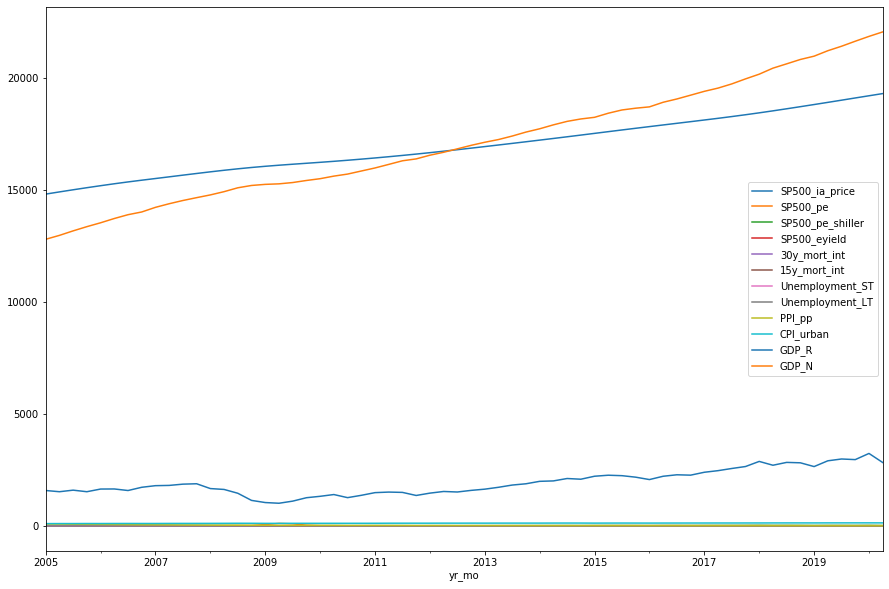

In [58]:
# Simple plot, but doesn't make sense given value disparities
combined_qtly_df[combined_qtly_df.index >= "2005-01"].plot(figsize=(15,10));

In [67]:
# Daily Returns of individual datas
qtly_rtn = combined_qtly_df.pct_change().dropna()
qtly_rtn.head(-1)

,SP500_ia_price,SP500_pe,SP500_pe_shiller,SP500_eyield,30y_mort_int,15y_mort_int,Unemployment_ST,Unemployment_LT,PPI_pp,CPI_urban,GDP_R,GDP_N
yr_mo,,,,,,,,,,,,
2005-04,-0.034123,-0.048524,-0.044378,0.052000,0.025394,0.045433,-0.001681,-0.001681,-0.046414,0.018868,0.006589,0.013639
2005-07,0.045346,-0.001052,0.034632,0.000000,-0.027327,-0.024041,-0.001593,-0.001593,-0.073009,0.002646,0.006401,0.015504
2005-10,-0.043379,-0.071579,-0.053633,0.077947,0.064969,0.065846,-0.001387,-0.001387,-0.051313,0.017590,0.006178,0.014276
2006-01,0.077670,0.024376,0.063907,-0.024691,0.013190,0.015111,-0.001173,-0.001173,-0.044025,-0.004322,0.005905,0.012924
2006-04,0.002159,-0.016602,-0.012089,0.018083,0.058991,0.077933,-0.001243,-0.001243,-0.077632,0.014757,0.005688,0.014103
2006-07,-0.041716,-0.065279,-0.055449,0.069272,0.039186,0.038180,-0.001652,-0.001652,-0.071327,0.010265,0.005369,0.012407
2006-10,0.090956,0.031908,0.074494,-0.031561,-0.059889,-0.053208,-0.002281,-0.002281,-0.073733,-0.008467,0.005035,0.008745
2007-01,0.041404,0.012835,0.025245,-0.012007,-0.022021,-0.014050,-0.002855,-0.002855,-0.034826,0.001964,0.004843,0.014722
2007-04,0.006491,0.006912,-0.008453,-0.006944,-0.006031,-0.013831,-0.003205,-0.003205,-0.048110,0.019910,0.004841,0.011336


In [63]:
# Correlation matrix of datas
correlation = qtly_rtn.corr()
correlation

,SP500_ia_price,SP500_pe,SP500_pe_shiller,SP500_eyield,30y_mort_int,15y_mort_int,Unemployment_ST,Unemployment_LT,PPI_pp,CPI_urban,GDP_R,GDP_N
SP500_ia_price,1.000000,-0.195457,0.984150,0.206524,0.199184,0.147492,-0.196766,-0.037789,0.137760,0.113435,-0.079830,0.114880
SP500_pe,-0.195457,1.000000,-0.184431,-0.754136,-0.263993,-0.254063,0.079347,-0.011004,-0.131687,-0.321516,-0.030606,-0.214144
SP500_pe_shiller,0.984150,-0.184431,1.000000,0.259732,0.206138,0.152309,-0.087641,0.055721,0.129449,0.103605,-0.182585,0.033310
SP500_eyield,0.206524,-0.754136,0.259732,1.000000,0.073403,0.056466,0.296299,0.361888,0.143938,0.090414,-0.250614,-0.064011
30y_mort_int,0.199184,-0.263993,0.206138,0.073403,1.000000,0.980925,-0.151193,-0.089702,0.003941,0.413398,0.099712,0.266121
15y_mort_int,0.147492,-0.254063,0.152309,0.056466,0.980925,1.000000,-0.160929,-0.128372,0.016651,0.348083,0.152778,0.269703
Unemployment_ST,-0.196766,0.079347,-0.087641,0.296299,-0.151193,-0.160929,1.000000,0.854871,-0.258168,-0.059252,-0.366530,-0.255837
Unemployment_LT,-0.037789,-0.011004,0.055721,0.361888,-0.089702,-0.128372,0.854871,1.000000,-0.267461,0.020380,-0.438385,-0.192722
PPI_pp,0.137760,-0.131687,0.129449,0.143938,0.003941,0.016651,-0.258168,-0.267461,1.000000,-0.177324,-0.235829,-0.165770
CPI_urban,0.113435,-0.321516,0.103605,0.090414,0.413398,0.348083,-0.059252,0.020380,-0.177324,1.000000,0.144545,0.473590


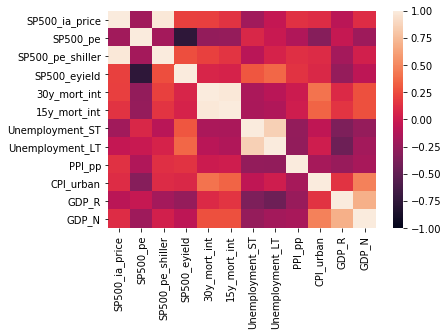

In [68]:
# Correlation matrix - visual
sns.heatmap(correlation,vmin=-1,vmax=1);

In [69]:
# Correlation coefficients - summed values
correlation.sum().sort_values(axis=0,ascending=True)

SP500_pe           -1.281690
PPI_pp              0.195498
GDP_R               0.503369
Unemployment_ST     0.694202
Unemployment_LT     1.127425
SP500_eyield        1.419903
GDP_N               1.955832
CPI_urban           2.149358
SP500_ia_price      2.393583
SP500_pe_shiller    2.469758
15y_mort_int        2.581044
30y_mort_int        2.737933
dtype: float64